In [7]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header

HTML(header())

# Combined operations
## Morphological thinning and skeletonizing 
by iterating the Hit-or-Miss transform one can extract the skeleton of the binary shape

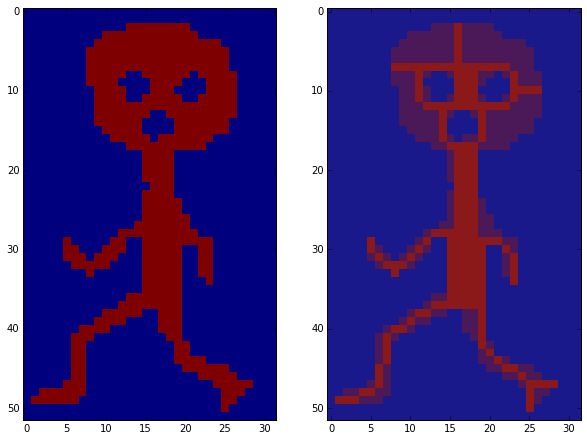

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.data import imread
from skimage.morphology import erosion

def hit_or_miss(X,B12):
    B1 = B12 == 1
    B2 = B12 == 0
    r = np.logical_and(erosion(X,B1),erosion(1-X,B2))
    return r

X = (imread('http://homepages.ulb.ac.be/~odebeir/data/man.tif')>0)[:,:,0].astype(np.uint8)
B12_a = np.array([[2,1,2],[0,1,1],[0,0,2]]) # . are coded with 2
B12_b = B12_a[:,-1::-1]
B12_c = B12_b[-1::-1,:]
B12_d = B12_c[:,-1::-1]

#iterate on the four structuring element

selem = [B12_a,B12_b,B12_c,B12_d]

R = X.copy()

for i in range(10):
    for s in selem:
        HoM = hit_or_miss(R,s)  
        R[HoM] = 0

plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(X,interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(X,interpolation='nearest',alpha = .8)
plt.imshow(R,interpolation='nearest',alpha=.5);



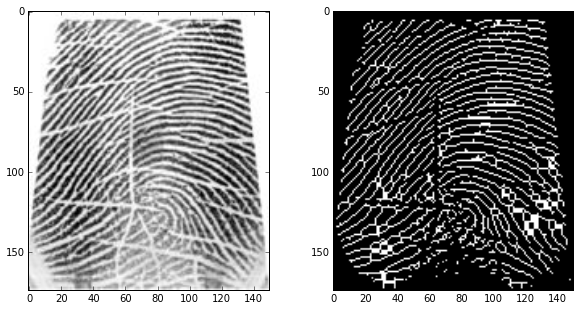

In [31]:
from skimage.filter import threshold_otsu

im = imread('http://biometrics.idealtest.org/userfiles/image/FingerprintV5Fig.1.jpg')[:,:150,0]
th_otsu = threshold_otsu(im)

R = (im<th_otsu).copy()

for i in range(10):
    for s in selem:
        HoM = hit_or_miss(R,s)  
        R[HoM] = 0

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(im,cmap=plt.cm.gray);

plt.subplot(1,2,2)
plt.imshow(R,cmap=plt.cm.gray);

>see also:
* Morphological algorithms [DIPM](../00-Preface/06-References.ipynb#[DIPM]) pp143-166

## Euclidian Distance Map (EDM) 

>see also:
* Euclidian Distance Map [IPH](../00-Preface/06-References.ipynb#[IPH])

## Ultimate Eroded Point (UEP) 

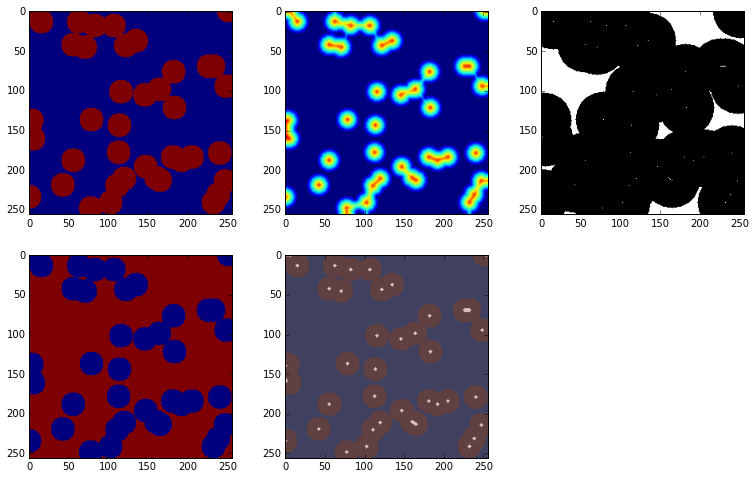

In [81]:
import numpy as np
from skimage.morphology import disk
import skimage.filter.rank as skr
from scipy import ndimage as ndi

np.random.seed(1)
n = np.random.random((256,256))<.0005
d = skr.maximum(n,disk(15))

distance = ndi.distance_transform_edt(d).astype(np.uint8)
local_max = distance == skr.maximum(distance,disk(20))
background = distance == 0
c_local_max = local_max.copy()
c_local_max[background] = 0


plt.figure(figsize=[13,8])
plt.subplot(2,3,1)
plt.imshow(d)
plt.subplot(2,3,2)
plt.imshow(distance)
plt.subplot(2,3,3)
plt.imshow(local_max,cmap=plt.cm.gray)
plt.subplot(2,3,4)
plt.imshow(background)
plt.subplot(2,3,5)
plt.imshow(d,alpha=.5)
plt.imshow(skr.maximum(c_local_max,disk(2)),cmap=plt.cm.gray,alpha=.5);

>see also:
* Ultimate Eroded Point [IPH](../00-Preface/06-References.ipynb#[IPH])

## Alternate Sequential Filter
## Morphological texture analysis 

>see also:
* Morphological texture analysis [DIPM](../00-Preface/06-References.ipynb#[DIPM]) pp43-102

## Object labeling

## Hole filling

## Hole filling (recursive approach